### 라이브러리

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 확인

In [2]:
data = pd.read_csv('./queen_notshort.csv', lineterminator='\n', low_memory=False)
data.head(3)

,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,tweet_len
0,0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,...,0,0,[],[],https://twitter.com/INPD_/status/1568167503947...,False,NaN,1,https://pbs.twimg.com/media/FcM_yTPWQAAqAck.jpg,244
1,1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,...,0,0,[],[],https://twitter.com/UKPostbox/status/156816750...,False,NaN,1,https://pbs.twimg.com/media/FcM_7H_XgAEDifo.jpg,219
2,2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,...,0,0,"['queenelizabeth', 'worldchanger', 'leadership']",[],https://twitter.com/brandminds/status/15681675...,False,NaN,1,https://pbs.twimg.com/media/FcNABxgWIAAyuK2.jpg,171


In [3]:
data.columns  # 데이터 컬럼 확인

Index(['index', 'id', 'conversation_id', 'created_at', 'date', 'time',
       'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language',
       'mentions', 'urls', 'photos', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url',
       'video', 'thumbnail', 'tweet_len'],
      dtype='object')

### 샘플링 함수

In [4]:
def sampling(df, target_num):
    randnum = random.randrange(1, 1501)
    sampled = df.sample(n=target_num,
                        random_state=randnum).reset_index(drop=True)
    return sampled

### 트윗 시간순 확인

In [5]:
time_lst = list(data['time'])
time_lst = [int(t[:2]) for t in time_lst]
data['hour'] = time_lst

time_0 = data.loc[0]['time']
hour_0 = data.loc[0]['hour']
print(f'0번째 트윗의 시간: {time_0}, {hour_0}')

0번째 트윗의 시간: 14:50:42, 14


In [6]:
# 시간순에 따른 트윗량 데이터프레임화
every_hour = []
tweets_per_hour = []
for i in range(24):
    every_hour.append(i)
    time_idx = list(data[data['hour'] == i].index)
    tweets_per_hour.append(len(time_idx))
    
tweets_per_hour_df = pd.DataFrame({'hour': every_hour,
                                   'tweets': tweets_per_hour})
tweets_per_hour_df.head(10)

,hour,tweets
0,0,32526
1,1,19575
2,2,14009
3,3,10717
4,4,7978
5,5,6347
6,6,5365
7,7,4870
8,8,5264
9,9,4439


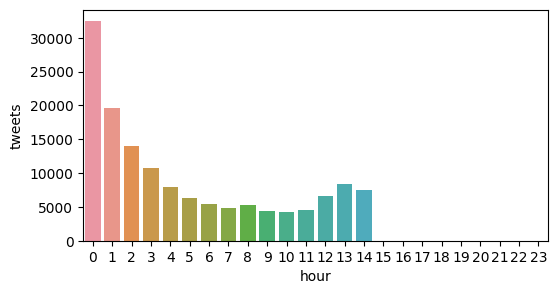

In [7]:
# 시간순에 따른 트윗량 시각화
plt.figure(figsize=(6, 3))
sns.barplot(x='hour', y='tweets', data=tweets_per_hour_df)
plt.show()

In [8]:
# 시간순에 따른 트윗량 데이터프레임화 2
time_df_x = ['0', '1~2', '3~5', '6~9']
time_df_y = [tweets_per_hour[0]]
time_df_y.append(tweets_per_hour[1]+tweets_per_hour[2])
time_df_y.append(tweets_per_hour[3]+tweets_per_hour[4]+tweets_per_hour[5])
time_df_y.append(tweets_per_hour[6]+tweets_per_hour[7]+tweets_per_hour[8]+tweets_per_hour[9])

tweets_per_hour_df2 = pd.DataFrame({'hour': time_df_x,
                                    'tweets': time_df_y})
tweets_per_hour_df2.head()

,hour,tweets
0,0,32526
1,1~2,33584
2,3~5,25042
3,6~9,19938


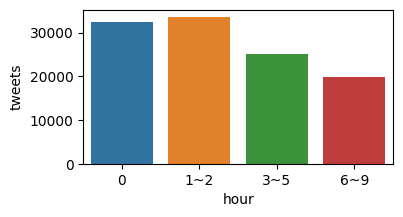

In [9]:
# 시간순에 따른 트윗량 시각화 2
plt.figure(figsize=(4, 2))
sns.barplot(x='hour', y='tweets', data=tweets_per_hour_df2)
plt.show()

In [10]:
# 시간순에 따른 트윗량이 균등하도록 샘플링
data_hour_0    = data[data['hour'] == 0]
data_hour_1to2 = data[(0 < data['hour']) & (data['hour'] <= 2)]
data_hour_3to5 = data[(2 < data['hour']) & (data['hour'] <= 5)]
data_hour_6to9 = data[(5 < data['hour']) & (data['hour'] <= 9)]

print('샘플링 전')
print(f'새벽 0시 트윗량  : {len(data_hour_0)}개')
print(f'새벽 1~2시 트윗량: {len(data_hour_1to2)}개')
print(f'새벽 3~5시 트윗량: {len(data_hour_3to5)}개')
print(f'새벽 6~9시 트윗량: {len(data_hour_6to9)}개\n')

data_hour_0    = sampling(data_hour_0, 19938)
data_hour_1to2 = sampling(data_hour_1to2, 19938)
data_hour_3to5 = sampling(data_hour_3to5, 19938)

print('샘플링 후')
print(f'새벽 0시 트윗량  : {len(data_hour_0)}개')
print(f'새벽 1~2시 트윗량: {len(data_hour_1to2)}개')
print(f'새벽 3~5시 트윗량: {len(data_hour_3to5)}개')
print(f'새벽 6~9시 트윗량: {len(data_hour_6to9)}개')

샘플링 전
새벽 0시 트윗량  : 32526개
새벽 1~2시 트윗량: 33584개
새벽 3~5시 트윗량: 25042개
새벽 6~9시 트윗량: 19938개

샘플링 후
새벽 0시 트윗량  : 19938개
새벽 1~2시 트윗량: 19938개
새벽 3~5시 트윗량: 19938개
새벽 6~9시 트윗량: 19938개


In [11]:
# 시간순에 따라 샘플링된 트윗별로 저장
hour_path = './condition/hour/queen_'

data_hour_0.to_csv(hour_path+'hour_0.csv', index=False, encoding='utf-8-sig')
data_hour_1to2.to_csv(hour_path+'hour_1to2.csv', index=False, encoding='utf-8-sig')
data_hour_3to5.to_csv(hour_path+'hour_3to5.csv', index=False, encoding='utf-8-sig')
data_hour_6to9.to_csv(hour_path+'hour_6to9.csv', index=False, encoding='utf-8-sig')

### 트윗 좋아요순 확인

In [12]:
like_lst = list(data['likes_count'])
like_150 = data.loc[150]['likes_count']
print(f'150번째 트윗의 좋아요 개수: {like_150}')

150번째 트윗의 좋아요 개수: 11


In [13]:
zero_like_cnt     = sum([1 if like == 0 else 0 for like in like_lst])
under10_like_cnt  = sum([1 if 0 < like and like <= 10 else 0 for like in like_lst])
under50_like_cnt  = sum([1 if 10 < like and like <= 50 else 0 for like in like_lst])
under100_like_cnt = sum([1 if 50 < like and like <= 100 else 0 for like in like_lst])
over100_like_cnt  = sum([1 if 100 < like else 0 for like in like_lst])

print(f'전체 트윗량: {len(data)}개\n')

print(f'좋아요 0개 트윗량      : {zero_like_cnt}개')
print(f'좋아요 1~10개 트윗량   : {under10_like_cnt}개')
print(f'좋아요 11~50개 트윗량  : {under50_like_cnt}개')
print(f'좋아요 51~100개 트윗량 : {under100_like_cnt}개')
print(f'좋아요 100개 이상 트윗량: {over100_like_cnt}개')
print(f'전체 트윗량: {zero_like_cnt + under10_like_cnt + under50_like_cnt + under100_like_cnt + over100_like_cnt}개')

전체 트윗량: 142348개

좋아요 0개 트윗량      : 66337개
좋아요 1~10개 트윗량   : 58400개
좋아요 11~50개 트윗량  : 11812개
좋아요 51~100개 트윗량 : 2224개
좋아요 100개 이상 트윗량: 3575개
전체 트윗량: 142348개


In [14]:
# 좋아요순에 따른 트윗량 데이터프레임화
like_df_x = ['0', '1~10', '11~50', '51~100', 'over 100']
like_df_y = [zero_like_cnt, under10_like_cnt, under50_like_cnt, under100_like_cnt, over100_like_cnt]

tweets_per_like_df = pd.DataFrame({'likes': like_df_x,
                                   'tweets': like_df_y})
tweets_per_like_df.head(5)

,likes,tweets
0,0,66337
1,1~10,58400
2,11~50,11812
3,51~100,2224
4,over 100,3575


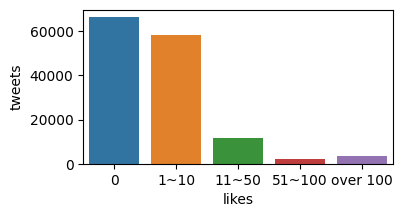

In [15]:
# 좋아요순에 따른 트윗량 시각화
plt.figure(figsize=(4, 2))
sns.barplot(x='likes', y='tweets', data=tweets_per_like_df)
plt.show()

In [16]:
# 좋아요순에 따른 트윗량이 균등하도록 샘플링
data_like_0       = data[data['likes_count'] == 0]
data_like_1to10   = data[(0 < data['likes_count']) & (data['likes_count'] <= 10)]
data_like_11to50  = data[(10 < data['likes_count']) & (data['likes_count'] <= 50)]
data_like_51to100 = data[(50 < data['likes_count']) & (data['likes_count'] <= 100)]
data_like_over100 = data[100 < data['likes_count']]

print('샘플링 전')
print(f'좋아요 0개 트윗량      : {len(data_like_0)}개')
print(f'좋아요 1~10개 트윗량   : {len(data_like_1to10)}개')
print(f'좋아요 11~50개 트윗량  : {len(data_like_11to50)}개')
print(f'좋아요 51~100개 트윗량 : {len(data_like_51to100)}개')
print(f'좋아요 100개 이상 트윗량: {len(data_like_over100)}개\n')

data_like_0       = sampling(data_like_0, 2224)
data_like_1to10   = sampling(data_like_1to10, 2224)
data_like_11to50  = sampling(data_like_11to50, 2224)
data_like_over100 = sampling(data_like_over100, 2224)

print('샘플링 후')
print(f'좋아요 0개 트윗량      : {len(data_like_0)}개')
print(f'좋아요 1~10개 트윗량   : {len(data_like_1to10)}개')
print(f'좋아요 11~50개 트윗량  : {len(data_like_11to50)}개')
print(f'좋아요 51~100개 트윗량 : {len(data_like_51to100)}개')
print(f'좋아요 100개 이상 트윗량: {len(data_like_over100)}개')

샘플링 전
좋아요 0개 트윗량      : 66337개
좋아요 1~10개 트윗량   : 58400개
좋아요 11~50개 트윗량  : 11812개
좋아요 51~100개 트윗량 : 2224개
좋아요 100개 이상 트윗량: 3575개

샘플링 후
좋아요 0개 트윗량      : 2224개
좋아요 1~10개 트윗량   : 2224개
좋아요 11~50개 트윗량  : 2224개
좋아요 51~100개 트윗량 : 2224개
좋아요 100개 이상 트윗량: 2224개


In [17]:
# 좋아요순에 따라 샘플링된 트윗별로 저장
like_path = './condition/likes_count/queen_'

data_like_0.to_csv(like_path+'like_0.csv', index=False, encoding='utf-8-sig')
data_like_1to10.to_csv(like_path+'like_1to10.csv', index=False, encoding='utf-8-sig')
data_like_11to50.to_csv(like_path+'like_11to50.csv', index=False, encoding='utf-8-sig')
data_like_51to100.to_csv(like_path+'like_51to100.csv', index=False, encoding='utf-8-sig')
data_like_over100.to_csv(like_path+'like_over100.csv', index=False, encoding='utf-8-sig')

### 트윗 답글순 확인

In [18]:
retweet_lst = list(data['retweets_count'])
retweet_150 = data.loc[150]['retweets_count']
print(f'150번째 트윗의 답글 개수: {retweet_150}')

150번째 트윗의 답글 개수: 1


In [19]:
zero_retweet_cnt     = sum([1 if rt == 0 else 0 for rt in retweet_lst])
under10_retweet_cnt  = sum([1 if 0 < rt and rt <= 10 else 0 for rt in retweet_lst])
under50_retweet_cnt  = sum([1 if 10 < rt and rt <= 50 else 0 for rt in retweet_lst])
under100_retweet_cnt = sum([1 if 50 < rt and rt <= 100 else 0 for rt in retweet_lst])
over100_retweet_cnt  = sum([1 if 100 < rt else 0 for rt in retweet_lst])

print(f'전체 트윗량: {len(data)}개\n')

print(f'답글 0개 트윗량      : {zero_retweet_cnt}개')
print(f'답글 1~10개 트윗량   : {under10_retweet_cnt}개')
print(f'답글 11~50개 트윗량  : {under50_retweet_cnt}개')
print(f'답글 51~100개 트윗량 : {under100_retweet_cnt}개')
print(f'답글 100개 이상 트윗량: {over100_retweet_cnt}개')
print(f'전체 트윗량: {zero_retweet_cnt + under10_retweet_cnt + under50_retweet_cnt + under100_retweet_cnt + over100_retweet_cnt}개')

전체 트윗량: 142348개

답글 0개 트윗량      : 107827개
답글 1~10개 트윗량   : 29508개
답글 11~50개 트윗량  : 3459개
답글 51~100개 트윗량 : 697개
답글 100개 이상 트윗량: 857개
전체 트윗량: 142348개


In [20]:
# 답글순에 따른 트윗량 데이터프레임화
retweet_df_x = ['0', '1~10', '11~50', '51~100', 'over 100']
retweet_df_y = [zero_retweet_cnt, under10_retweet_cnt, under50_retweet_cnt, under100_retweet_cnt, over100_retweet_cnt]

tweets_per_retweet_df = pd.DataFrame({'retweets': retweet_df_x,
                                      'tweets': retweet_df_y})
tweets_per_retweet_df.head(5)

,retweets,tweets
0,0,107827
1,1~10,29508
2,11~50,3459
3,51~100,697
4,over 100,857


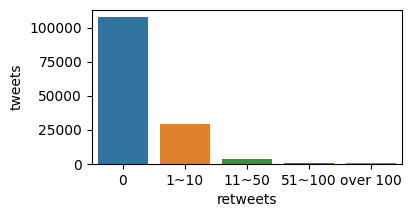

In [21]:
# 답글순에 따른 트윗량 시각화
plt.figure(figsize=(4, 2))
sns.barplot(x='retweets', y='tweets', data=tweets_per_retweet_df)
plt.show()

In [22]:
# 답글순에 따른 트윗량이 균등하도록 샘플링
data_rt_0       = data[data['retweets_count'] == 0]
data_rt_1to10   = data[(0 < data['retweets_count']) & (data['retweets_count'] <= 10)]
data_rt_11to50  = data[(10 < data['retweets_count']) & (data['retweets_count'] <= 50)]
data_rt_51to100 = data[(50 < data['retweets_count']) & (data['retweets_count'] <= 100)]
data_rt_over100 = data[100 < data['retweets_count']]

print('샘플링 전')
print(f'답글 0개 트윗량      : {len(data_rt_0)}개')
print(f'답글 1~10개 트윗량   : {len(data_rt_1to10)}개')
print(f'답글 11~50개 트윗량  : {len(data_rt_11to50)}개')
print(f'답글 51~100개 트윗량 : {len(data_rt_51to100)}개')
print(f'답글 100개 이상 트윗량: {len(data_rt_over100)}개\n')

data_rt_0       = sampling(data_rt_0, 697)
data_rt_1to10   = sampling(data_rt_1to10, 697)
data_rt_11to50  = sampling(data_rt_11to50, 697)
data_rt_over100 = sampling(data_rt_over100, 697)

print('샘플링 후')
print(f'답글 0개 트윗량      : {len(data_rt_0)}개')
print(f'답글 1~10개 트윗량   : {len(data_rt_1to10)}개')
print(f'답글 11~50개 트윗량  : {len(data_rt_11to50)}개')
print(f'답글 51~100개 트윗량 : {len(data_rt_51to100)}개')
print(f'답글 100개 이상 트윗량: {len(data_rt_over100)}개')

샘플링 전
답글 0개 트윗량      : 107827개
답글 1~10개 트윗량   : 29508개
답글 11~50개 트윗량  : 3459개
답글 51~100개 트윗량 : 697개
답글 100개 이상 트윗량: 857개

샘플링 후
답글 0개 트윗량      : 697개
답글 1~10개 트윗량   : 697개
답글 11~50개 트윗량  : 697개
답글 51~100개 트윗량 : 697개
답글 100개 이상 트윗량: 697개


In [23]:
# 답글순에 따라 샘플링된 트윗별로 저장
rt_path = './condition/retweets_count/queen_'

data_rt_0.to_csv(rt_path+'rt_0.csv', index=False, encoding='utf-8-sig')
data_rt_1to10.to_csv(rt_path+'rt_1to10.csv', index=False, encoding='utf-8-sig')
data_rt_11to50.to_csv(rt_path+'rt_11to50.csv', index=False, encoding='utf-8-sig')
data_rt_51to100.to_csv(rt_path+'rt_51to100.csv', index=False, encoding='utf-8-sig')
data_rt_over100.to_csv(rt_path+'rt_over100.csv', index=False, encoding='utf-8-sig')